In [60]:
%matplotlib inline
from scipy import stats
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels import graphics
from patsy import dmatrices
# load R
%load_ext rpy2.ipython

plt.rcParams['figure.figsize'] = [15, 10]

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


## Help:
[Getting started](http://statsmodels.sourceforge.net/devel/gettingstarted.html)<br>
[Formulas](http://statsmodels.sourceforge.net/devel/example_formulas.html)

### load the boston housing dataset - median house values in the Boston area

In [61]:
data = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/MASS/Boston.csv')
data.head(3)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


## Fit ols without formula

In [3]:
y = data['medv']
x = data[['lstat','age']].copy()
x['intercept'] = 1
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Fri, 28 Apr 2017   Prob (F-statistic):           2.98e-88
Time:                        15:17:38   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
intercept     33.2228      0.731     45.458      0.000      31.787      34.659
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## With formulas
more about formulas: [here](http://statsmodels.sourceforge.net/devel/example_formulas.html)

In [4]:
# random variable
data['rand'] = np.random.uniform(10, 20, len(data))
# Fit the same model with formula
model = smf.ols("medv ~ lstat + age + rand", data).fit()

print("Retrieving manually the parameter estimates:")
print(model.params)

# Print the summary
model.summary()

Retrieving manually the parameter estimates:
Intercept    34.521739
lstat        -1.032401
age           0.034517
rand         -0.086884
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     206.2
Date:                Fri, 28 Apr 2017   Prob (F-statistic):           3.84e-87
Time:                        15:17:39   Log-Likelihood:                -1637.1
No. Observations:                 506   AIC:                             3282.
Df Residuals:                     502   BIC:                             3299.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5217      1.572     21.959      0.000      31.433      37.610
lstat         -1.0324      0.048    -21.420      0.000      -1.127      -0.938
age            0.0345      0.012      2.823      0.005       0.010       0.059
rand          -0.0869      0.093     -0.933      0.351      -0.270       0.096
==============================================================================
Omnibus:                      124.325   Durbin-Watson:                   0.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.645
Skew:                           1.361   Prob(JB):                     7.52e-54
Kurtosis:                       5.049   Cond. No.                         439.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
# Peform analysis of variance on fitted linear model wit ANOVA
anova_lm(model)

/usr/local/lib/python3.5/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.5/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.5/dist-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
lstat,1.0,23243.913997,23243.913997,609.798199,1.012047e-88
age,1.0,304.252810,304.252810,7.981995,4.912618e-03
rand,1.0,33.200279,33.200279,0.871001,3.511270e-01
Residual,502.0,19134.928330,38.117387,NaN,NaN


## Get X, y from a formula with patsy

In [6]:
# Break into left and right hand side; y and X
y, X = dmatrices("medv ~ lstat + age + rand", data=data, return_type="dataframe")
X.head(3)

,Intercept,lstat,age,rand
0,1.0,4.98,65.2,11.579343
1,1.0,9.14,78.9,13.033744
2,1.0,4.03,61.1,11.185364


### Variance inflation factor (VIF), for one exogenous variable

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Break into left and right hand side; y and X
y, X = dmatrices("medv ~ lstat + age + rand", data=data, return_type="dataframe")
# For each Xi, calculate VIF
vif = {}
for i, column in enumerate(X.columns):
    vif[column] = variance_inflation_factor(X.values, i)
pd.DataFrame([vif])

,Intercept,age,lstat,rand
0,32.80891,1.569404,1.56948,1.000127


## Prediction and Confidence intervals
I dont know how to get it in python so will get it in R

In [22]:
newdata = data.iloc[[0]]

In [23]:
%%R -i data -i newdata -o prediction_intervals -o confidence_intervals
model <- lm(medv ~ lstat + age + rand, data=data)
prediction_intervals <- predict(model, newdata, interval="predict")
confidence_intervals <- predict(model, newdata, interval="confidence")

In [24]:
confidence_intervals, prediction_intervals

(array([[ 30.62485566,  29.56384154,  31.68586979]]),
 array([[ 30.62485566,  18.44861861,  42.80109271]]))

## covariance matrix of parameter estimates


In [9]:
model.cov_params()

,Intercept,lstat,age,rand
Intercept,2.471522,-0.005547,-0.005801,-0.129576
lstat,-0.005547,0.002323,-0.000355,0.000033
age,-0.005801,-0.000355,0.000150,0.000003
rand,-0.129576,0.000033,0.000003,0.008667


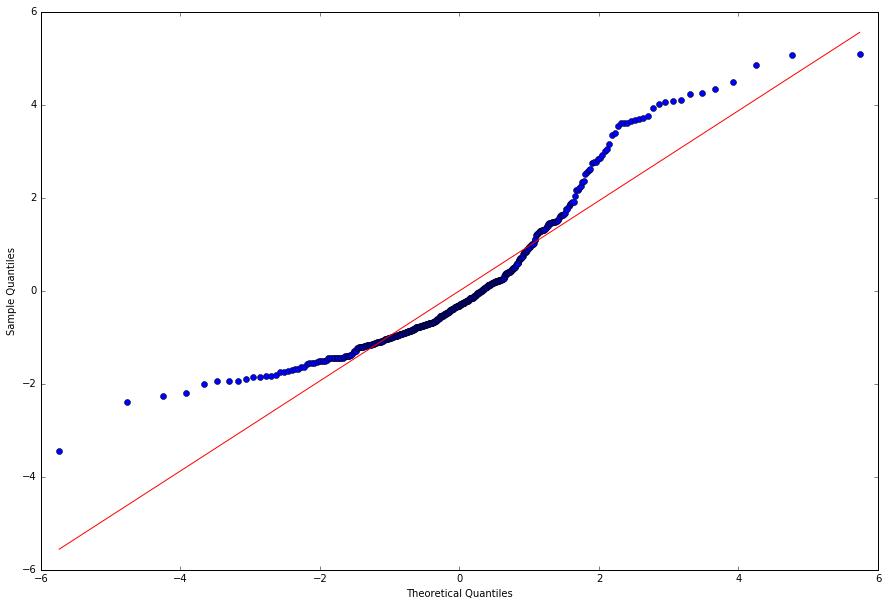

In [10]:
# residuals
residuals = model.resid
line = 'r' # '45' 's' 'q' 'r'
graphics.gofplots.qqplot(residuals, dist=stats.t, line=line, fit=True);

## Plot the residuals

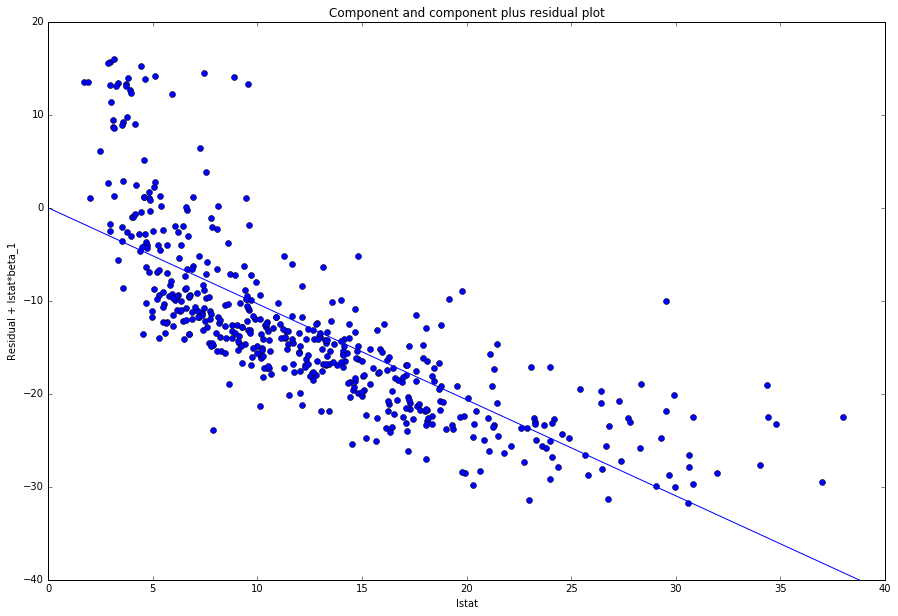

In [11]:
sm.graphics.plot_ccpr(model, exog_idx=1);

## Confidence intervals of the params

In [12]:
model.conf_int(0.05)   # 95% confidence interval

,0,1
Intercept,31.433018,37.610459
lstat,-1.127096,-0.937706
age,0.010495,0.058540
rand,-0.269790,0.096022


## Influance table

In [13]:
influence = model.get_influence()
influence_summary = influence.summary_frame()
influence_summary.head()

,dfb_Intercept,dfb_lstat,dfb_age,dfb_rand,cooks_d,dffits,dffits_internal,hat_diag,standard_resid,student_resid
0,-0.062986,0.060827,-0.031663,0.054338,0.002236,-0.094598,-0.094583,0.007651,-1.077166,-1.077338
1,-0.023337,0.032989,-0.030473,0.023130,0.000786,-0.056049,-0.056067,0.004607,-0.824163,-0.823900
2,0.034759,-0.030744,0.013388,-0.029409,0.000595,0.048734,0.048770,0.008691,0.520845,0.520467
3,0.017392,-0.009997,0.000084,-0.013595,0.000105,0.020449,0.020469,0.010108,0.202562,0.202368
4,-0.011601,-0.044070,0.006702,0.038269,0.001623,0.080583,0.080565,0.005287,1.105112,1.105356


## Cook's distance

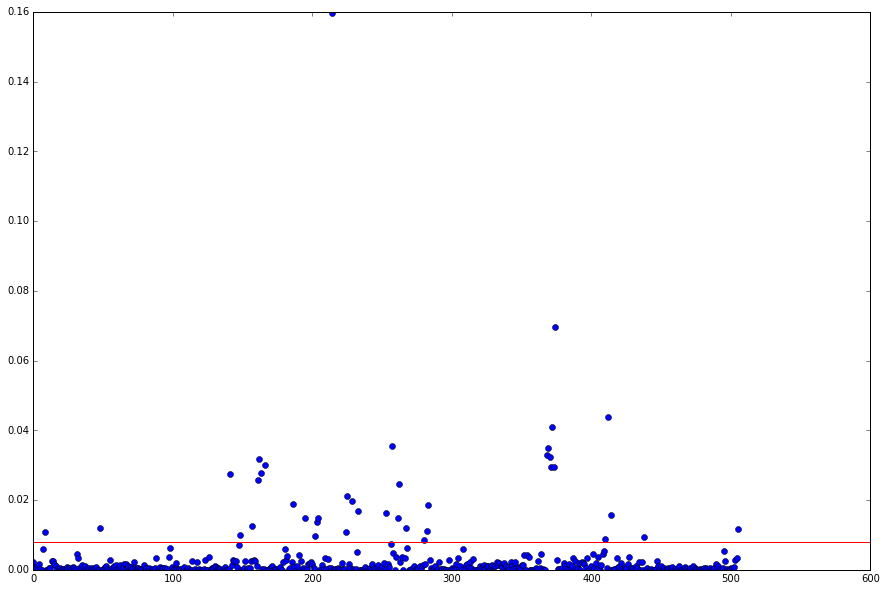

In [59]:
plt.plot(influence_summary.index, influence_summary['cooks_d'], 'o')
plt.axhline(y=4/(len(data)-1), color='r', linestyle='-')

### Plot influence yourself

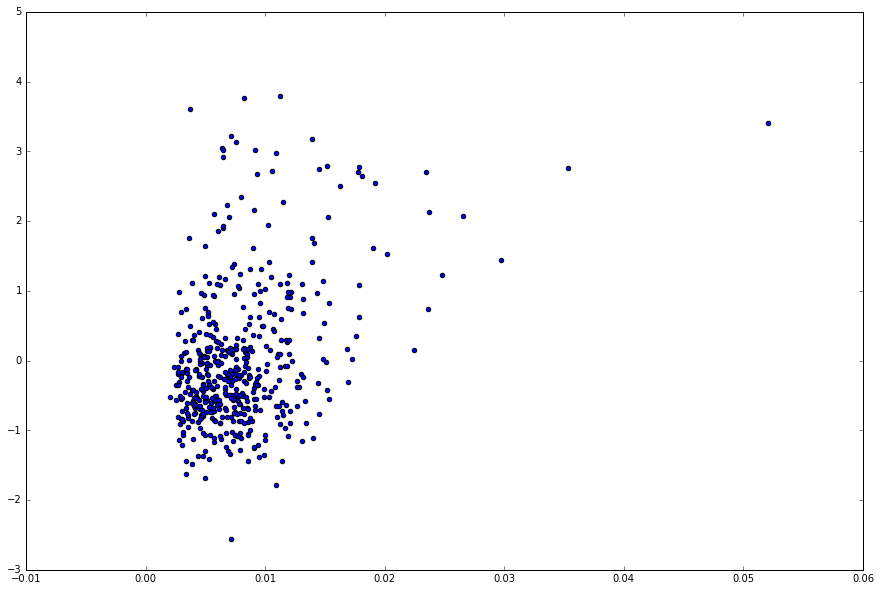

In [14]:
plt.scatter(influence_summary['hat_diag'], influence_summary['standard_resid'])

### Built in influence_plot

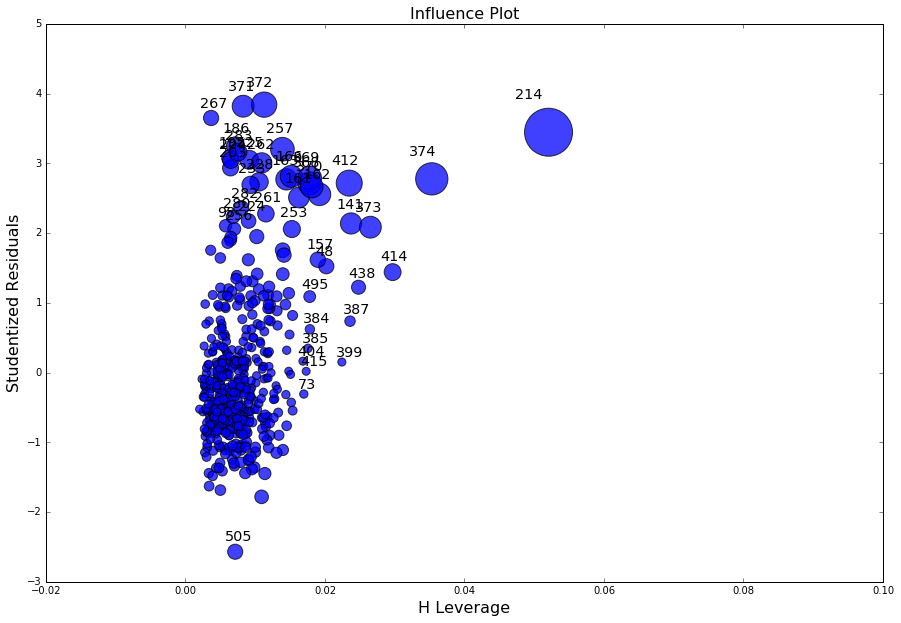

In [15]:
sm.graphics.influence_plot(model);

## Confidence and prediction intervals

In [32]:
x_test = pd.DataFrame(np.linspace(data['lstat'].min(), data['lstat'].max(), 100), columns=['lstat'])

In [54]:
%%R -i data -i x_test -o y_pred -o prediction_intervals -o confidence_intervals
model <- lm(medv ~ lstat, data=data)
y_pred <- predict(model, x_test)
prediction_intervals <- predict(model, data, interval="predict", alpha=0.05)
confidence_intervals <- predict(model, data, interval="confidence", alpha=0.05)

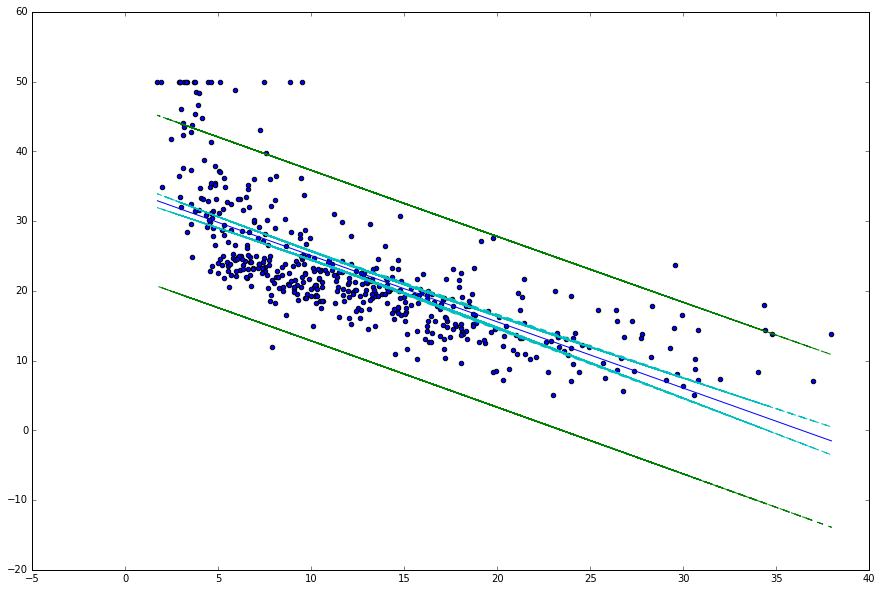

In [53]:
plt.scatter(data['lstat'], data['medv'])

plt.plot(x_test, y_pred)

st, intervals, ss2 = summary_table(model, alpha=0.05)

ci_low = intervals[:,4]
ci_hi = intervals[:,5]
pi_low = intervals[:,6]
pi_hi = intervals[:,7]

plt.plot(data["lstat"], prediction_intervals[:,1], 'g--')
plt.plot(data["lstat"], prediction_intervals[:,2], 'g--')
plt.plot(data["lstat"], confidence_intervals[:,1], 'c--')
plt.plot(data["lstat"], confidence_intervals[:,2], 'c--')

## Same in python but can only be done for fitted data

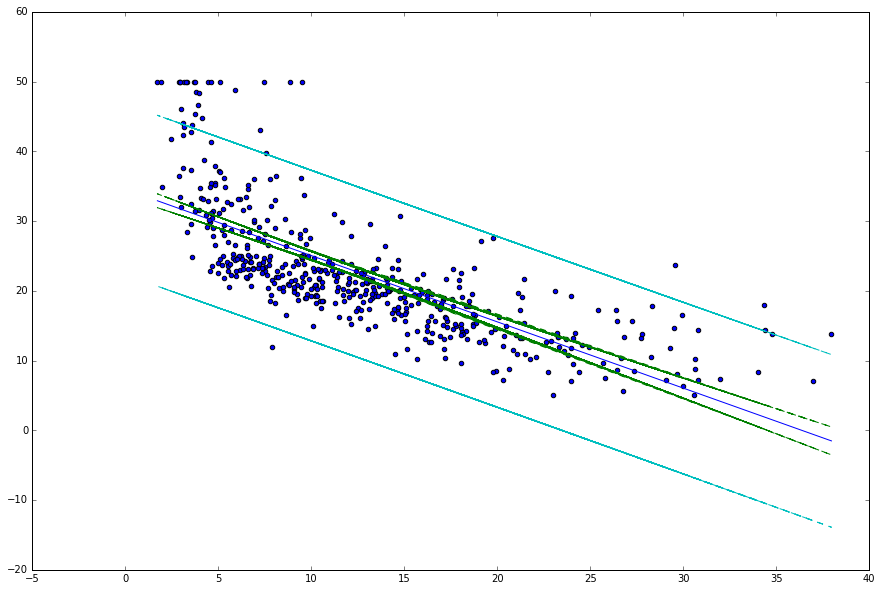

In [50]:
from statsmodels.stats.outliers_influence import summary_table

plt.scatter(data['lstat'], data['medv'])

model = smf.ols('medv ~ lstat', data).fit()

x_test = pd.DataFrame(np.linspace(data['lstat'].min(), data['lstat'].max(), 100), columns=['lstat'])
y_pred = model.predict(x_test)
plt.plot(x_test, y_pred)

st, intervals, ss2 = summary_table(model, alpha=0.05)

ci_low = intervals[:,4]
ci_hi = intervals[:,5]
pi_low = intervals[:,6]
pi_hi = intervals[:,7]

plt.plot(data["lstat"], ci_low, 'g--')
plt.plot(data["lstat"], ci_hi, 'g--')
plt.plot(data["lstat"], pi_low, 'c--')
plt.plot(data["lstat"], pi_hi, 'c--')

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 28 Apr 2017   Prob (F-statistic):           5.08e-88
Time:                        15:17:48   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multicollinearity
One way to assess multicollinearity is to compute the condition number. Values over 20 are worrisome (see Greene 4.9). The first step is to normalize the independent variables to have unit length:

In [41]:
np.linalg.cond(model.model.exog)

29.682309352388241

In [ ]:
norm_x = X.values
for i, name in enumerate(X):
    if name == "const":
        continue
    norm_x[:,i] = X[name]/np.linalg.norm(X[name])
norm_xtx = np.dot(norm_x.T,norm_x)


## You can also use formula-like syntax to test hypotheses

In [9]:
print(model.f_test("age = lstat"))
print(model.f_test("age = 0"))
print(model.f_test("rand = 15"))
print(model.f_test("rand = 15"))

<F test: F=array([[ 353.93338208]]), p=3.7680729719582815e-60, df_denom=502, df_num=1>
<F test: F=array([[ 7.59064845]]), p=0.006080326352752837, df_denom=502, df_num=1>
<F test: F=array([[ 23760.68417411]]), p=0.0, df_denom=502, df_num=1>
<F test: F=array([[ 23760.68417411]]), p=0.0, df_denom=502, df_num=1>


## Polynomial example

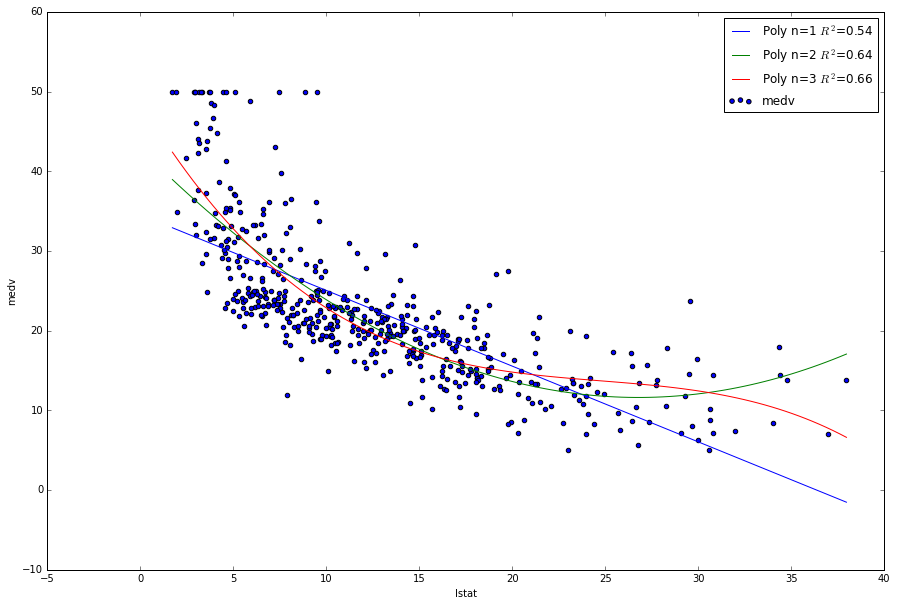

In [10]:
x_test = pd.DataFrame(np.linspace(data['lstat'].min(), data['lstat'].max(), 100), columns=['lstat'])

plt.scatter(data['lstat'], data['medv'])
plt.xlabel('lstat')
plt.ylabel('medv')

model = smf.ols('medv ~ lstat', data).fit()
y_pred = model.predict(x_test)
plt.plot(x_test, y_pred, 'b-', label='Poly n=1 $R^2$=%.2f' % model.rsquared)

# 2-nd order polynomial
model = smf.ols('medv ~ lstat + I(lstat ** 2.0)', data).fit()
y_pred = model.predict(x_test)
plt.plot(x_test, y_pred, 'g-', label='Poly n=2 $R^2$=%.2f' % model.rsquared)

# 3-rd order polynomial
model = smf.ols('medv ~ lstat + I(lstat ** 2.0) + I(lstat ** 3.0)', data).fit()
y_pred = model.predict(x_test)
plt.plot(x_test, y_pred, 'r-', label='Poly n=3 $R^2$=%.2f' % model.rsquared)

plt.legend()

In [11]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,48.6496,1.435,33.909,0.000,45.831,51.468
lstat,-3.8656,0.329,-11.757,0.000,-4.512,-3.220
I(lstat ** 2.0),0.1487,0.021,6.983,0.000,0.107,0.191
I(lstat ** 3.0),-0.0020,0.000,-5.013,0.000,-0.003,-0.001


In [12]:
model.summary().tables[0]

Dep. Variable:,medv,R-squared:,0.658
Model:,OLS,Adj. R-squared:,0.656
Method:,Least Squares,F-statistic:,321.7
Date:,"Tue, 25 Apr 2017",Prob (F-statistic):,1.78e-116
Time:,22:20:10,Log-Likelihood:,-1568.9
No. Observations:,506,AIC:,3146.
Df Residuals:,502,BIC:,3163.
Df Model:,3,,
Covariance Type:,nonrobust,,


## Categorical Variables

In [12]:
data = pd.read_csv('http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data', index_col=0).head()
data.head(3)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0


In [14]:
# famhist is categorical with 2 posible labels Present and Absent
smf.ols("chd ~ C(famhist) + sbp", data).fit().summary()

/usr/local/lib/python3.5/dist-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    chd   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     1.624
Date:                Fri, 28 Apr 2017   Prob (F-statistic):              0.381
Time:                        11:18:11   Log-Likelihood:               -0.10155
No. Observations:                   5   AIC:                             6.203
Df Residuals:                       2   BIC:                             5.031
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -1.3308      1.419     -0.938      0.447      -7.435       4.774
C(famhist)[T.Present]    -0.2743      0.437     -0.628      0.594      -2.153       1.605
sbp                       0.0162      0.009      1.709      0.230      -0.025       0.057
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.502
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.456
Skew:                           0.684   Prob(JB):                        0.796
Kurtosis:                       2.436   Cond. No.                     1.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Interaction examples

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/statsmodels/statsmodels/master/statsmodels/datasets/randhie/src/randhie.csv')
data[['mdvis', 'logincome', 'hlthp']].tail()

,mdvis,logincome,hlthp
20185,2,8.815268,0
20186,0,8.815268,0
20187,8,8.921870,0
20188,8,7.548329,0
20189,6,8.815268,0


### The * in the formula means that we want the interaction term in addition each term separately 
Functions can also be included in the formula

In [3]:
model = smf.ols('mdvis ~ np.log(1+income) * hlthp', data).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.5217,0.234,2.231,0.026,0.063,0.980
np.log(1 + income),0.2630,0.027,9.902,0.000,0.211,0.315
hlthp,-0.4991,0.890,-0.561,0.575,-2.243,1.245
np.log(1 + income):hlthp,0.4868,0.110,4.441,0.000,0.272,0.702


### Same as above but done manually

In [4]:
data["logincome"] = np.log(1 + data.income)
data['logincome:hlthp'] = data['logincome'] * data['hlthp']
data['Intercept'] = 1.
model = sm.OLS(data['mdvis'], data[['Intercept', 'logincome', 'hlthp', 'logincome:hlthp']]).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.5217,0.234,2.231,0.026,0.063,0.980
logincome,0.2630,0.027,9.902,0.000,0.211,0.315
hlthp,-0.4991,0.890,-0.561,0.575,-2.243,1.245
logincome:hlthp,0.4868,0.110,4.441,0.000,0.272,0.702


### The : in the formula means that we want the interaction term only

In [23]:
model = smf.ols('mdvis ~ logincome:hlthp', data).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.8121,0.032,88.470,0.000,2.750,2.874
logincome:hlthp,0.4200,0.032,13.043,0.000,0.357,0.483


### Same as above but done manually

In [24]:
data['logincome:hlthp'] = data['logincome'] * data['hlthp']
data['Intercept'] = 1.
model = sm.OLS(data['mdvis'], data[['Intercept', 'logincome:hlthp']]).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.8121,0.032,88.470,0.000,2.750,2.874
logincome:hlthp,0.4200,0.032,13.043,0.000,0.357,0.483


### To remove the intercept: -1

In [6]:
model = smf.ols('mdvis ~ income + hlthp - 1', data).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
income,0.0003,3.57e-06,83.530,0.000,0.000,0.000
hlthp,4.2489,0.263,16.155,0.000,3.733,4.764


### Custom calculations can be included in the formula wrapped in I()

In [8]:
model = smf.ols('mdvis ~ I((income + 5) * hlthp)', data).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.8161,0.032,88.761,0.000,2.754,2.878
I((income + 5) * hlthp),0.0006,4.21e-05,13.572,0.000,0.000,0.001
